In [5]:
import numpy as np

In [6]:
dogs = np.load('./full_numpy_bitmap_dog.npy')
elephants = np.load('./full_numpy_bitmap_elephant.npy')

In [7]:
X_train = np.concatenate((dogs, elephants), axis=0)

In [8]:
X_train.shape

(279128, 784)

In [9]:
X_train = X_train.reshape((X_train.shape[0],28,28))

In [8]:
X_train.shape

(279128, 28, 28)

In [9]:
dog_y = np.ones(len(dogs))
ele_y = np.zeros(len(elephants))
y_train = np.concatenate((dog_y, ele_y), axis=0)

In [10]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [11]:
X_train, y_train = unison_shuffled_copies(X_train, y_train)

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

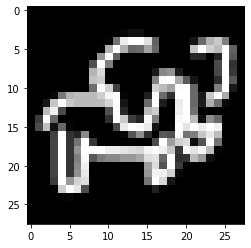

In [17]:
plt.imshow(elephants[500].reshape(28,28), cmap='gray')

In [50]:
X_train.shape

(279128, 28, 28, 1)

In [49]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool1D, Flatten

In [51]:
def create_model():
    
    model = Sequential()
    model.add(Conv2D(4, (2,2), padding='same', activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(4, (2,2), activation='relu'))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [53]:
# Defined arch
# Next step in Keras is to COMPILE!.... 

model = create_model()
epochs = 20
batch_size = 256

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Train on 279128 samples
Epoch 1/20
279128/279128 [==============================] - 26s 91us/sample - loss: 0.7567 - accuracy: 0.8153
Epoch 2/20
279128/279128 [==============================] - 25s 90us/sample - loss: 0.2858 - accuracy: 0.8784
Epoch 3/20
279128/279128 [==============================] - 24s 86us/sample - loss: 0.2293 - accuracy: 0.9050
Epoch 4/20
279128/279128 [==============================] - 25s 88us/sample - loss: 0.1674 - accuracy: 0.9334
Epoch 5/20
279128/279128 [==============================] - 24s 87us/sample - loss: 0.1099 - accuracy: 0.9579
Epoch 6/20
279128/279128 [==============================] - 24s 86us/sample - loss: 0.0728 - accuracy: 0.9723
Epoch 7/20
279128/279128 [==============================] - 24s 86us/sample - loss: 0.0533 - accuracy: 0.9804
Epoch 8/20
279128/279128 [==============================] - 24s 85us/sample - loss: 0.0435 - accuracy: 0.9842
Epoch 9/20
279128/279128 [==============================] - 24s 85us/sample - loss: 0.0361 - acc